In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## understanding threshold operator

In [2]:
img = cv.imread('../img/gray_gradient.jpg', cv.IMREAD_GRAYSCALE)

* create binary image with numpy operator

In [5]:
thresh_np = np.zeros_like(img)

In [7]:
thresh_np[img > 127] = 255

* create binary image with cv operator
    - cv.THRESH_BINARY: assign value if px > thres and 0 otherwise
    - cv.THRESH_BINARY_INV: assign value if px < thres and 0 otherwise
    - cv.THRESH_TRUNC: assign value if px > thres and retain original value otherwise
    - cv.THRESH_TOZERO: assign 0 if px > thres and retain original value otherwise
    - cv.THRESH_TOZERO_INV: opposite to THRESH_TOZERO

In [9]:
ret, thresh_cv = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

In [10]:
print(ret)

127.0


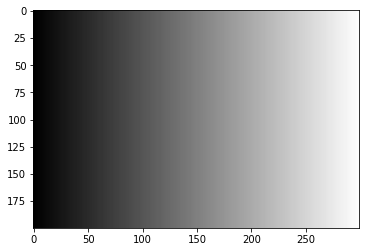

In [11]:
plt.imshow(img, cmap='gray')

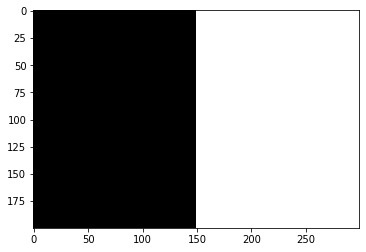

In [12]:
plt.imshow(thresh_np, cmap='gray')

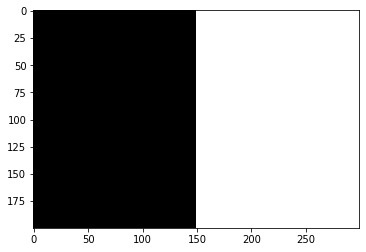

In [13]:
plt.imshow(thresh_cv, cmap='gray')

## automatically determine threshold (Otsu's binarization method)

$$ \sigma_w^2(t) = w_1 (t)\sigma_1^2(t) + w_2(t)\sigma_2^2(t)$$
- $t$: 0-255, threshold
- $w_1, \; w_2$: weights of proportion for each group
- $\sigma_1^2, \; \sigma_2^2$: variances for each group

In [18]:
img = cv.imread('../img/scaned_paper.jpg', cv.IMREAD_GRAYSCALE)

In [19]:
_, t_130 = cv.threshold(img, 130, 255, cv.THRESH_BINARY)

* otsu's method searchs all possible combinations
    - computationally too slow
    - not appropriate for noisy cases
        - one can consider applying blurring filter

In [20]:
t, t_otsu = cv.threshold(img, -1, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

In [29]:
t, t_otsu_2 = cv.threshold(img, -1, 255, cv.THRESH_OTSU)

In [33]:
(t_otsu != t_otsu_2).sum()

0

In [21]:
print('otsu threshold: ', t)

otsu threshold:  131.0


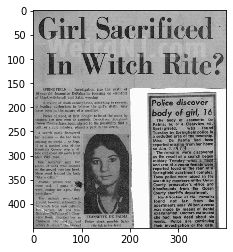

In [22]:
plt.imshow(img, cmap='gray')

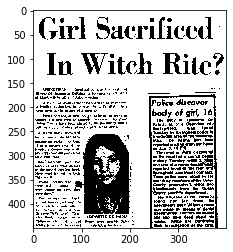

In [23]:
plt.imshow(t_130, cmap='gray')

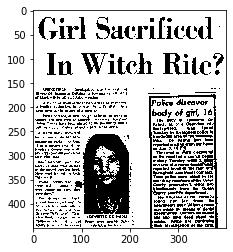

In [24]:
plt.imshow(t_otsu, cmap='gray')

## Adaptive Threshold
* cv.ADAPTIVE_THRESH_MEAN_C: average of neighboring pixels
* cv.ADAPTIVE_THRESH_GAUSSIAN_C: weighted average of gaussian distribution
    - much less noise but less clear image

In [34]:
# block size
blk_size = 9

# decaying parameter
C = 5

In [36]:
img = cv.imread('../img/sudoku.jpg', cv.IMREAD_GRAYSCALE)

In [37]:
ret, th1 = cv.threshold(img, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

In [38]:
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blk_size, C)

In [39]:
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blk_size, C)

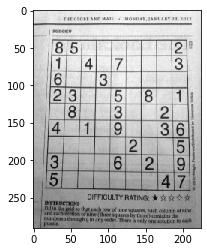

In [44]:
plt.imshow(img, cmap='gray')

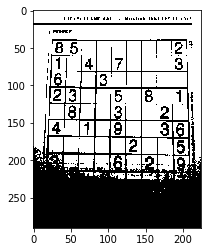

In [40]:
plt.imshow(th1, cmap='gray')

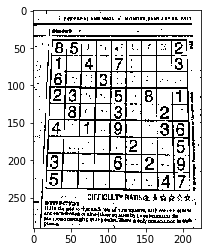

In [41]:
plt.imshow(th2, cmap='gray')

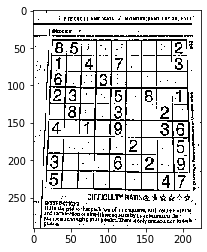

In [42]:
plt.imshow(th3, cmap='gray')